# Interactive Plots of COVID-19 Data
This is a notebook to interact with COVID-19 data using [Jupyter](https://jupyter.org/) and [Hvplot](https://hvplot.holoviz.org/). Currently we are focused on data from the US but may expand our analyses in the near future.

## Load Johns Hopkins COVID-19 Data
Here we load the COVID-19 confirmed case data from the [The Center for Systems Science and Engineering (CSSE)](https://systems.jhu.edu) at Johns Hopkins University. The CCSE COVID-19 [GitHub Repo](https://github.com/CSSEGISandData/COVID-19) has more information about these data and their sources.

In [77]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 25)
import hvplot.pandas
import datetime


In [85]:
# metric='Confirmed'
# metric='Deaths'
# metric='Recovered'


In [86]:
dr='https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'

In [87]:
tday=datetime.date.today()
tday

datetime.date(2020, 6, 12)

In [88]:
tday=datetime.date.today()
day=datetime.timedelta(days=1)
yday=tday-day*1
fname=yday.strftime('%m-%d-%Y.csv')

In [89]:
src = dr + fname
src

'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-11-2020.csv'

In [90]:
df1 = pd.read_csv(src)
df1

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,45001.0,Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,63,0,0,63,"Abbeville, South Carolina, US",256.859787,0.000000
1,22001.0,Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,529,31,0,498,"Acadia, Louisiana, US",852.606979,5.860113
2,51001.0,Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,984,13,0,971,"Accomack, Virginia, US",3044.931303,1.321138
3,16001.0,Ada,Idaho,US,2020-06-12 05:09:52,43.452658,-116.241552,854,22,0,832,"Ada, Idaho, US",177.330368,2.576112
4,19001.0,Adair,Iowa,US,2020-06-12 05:09:52,41.330756,-94.471059,10,0,0,10,"Adair, Iowa, US",139.821029,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3718,NaN,NaN,NaN,West Bank and Gaza,2020-06-12 05:09:52,31.952200,35.233200,487,3,410,74,West Bank and Gaza,9.546369,0.616016
3719,NaN,NaN,NaN,Western Sahara,2020-06-12 05:09:52,24.215500,-12.885800,9,1,6,2,Western Sahara,1.506705,11.111111
3720,NaN,NaN,NaN,Yemen,2020-06-12 05:09:52,15.552727,48.516388,591,136,23,432,Yemen,1.981495,23.011844
3721,NaN,NaN,NaN,Zambia,2020-06-12 05:09:52,-13.133897,27.849332,1200,10,912,278,Zambia,6.527431,0.833333


In [91]:
dfus=df1[['Combined_Key','Admin2','Province_State','Country_Region','Last_Update', 'Lat', 'Long_', metric]]
dfus=dfus[dfus.Country_Region=='US']
dfus.reset_index(drop=True, inplace=True)
dfus.set_index('Combined_Key', inplace=True)
dfus

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Recovered
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0
"Ada, Idaho, US",Ada,Idaho,US,2020-06-12 05:09:52,43.452658,-116.241552,0
"Adair, Iowa, US",Adair,Iowa,US,2020-06-12 05:09:52,41.330756,-94.471059,0
...,...,...,...,...,...,...,...
"Guam, US",NaN,Guam,US,2020-06-12 05:09:52,13.444300,144.793700,0
"Northern Mariana Islands, US",NaN,Northern Mariana Islands,US,2020-06-12 05:09:52,15.097900,145.673900,0
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-12 05:09:52,18.220800,-66.590100,0


In [92]:
#dOld=dfus['Last_Update'][0]
dOld=pd.to_datetime(dfus['Last_Update'][0]).date()
dOld

datetime.date(2020, 6, 12)

In [93]:
dfus1=dfus.rename(columns={metric:dOld})

In [94]:
#dfus1=dfus.copy()
dfus1

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-06-12
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0
"Ada, Idaho, US",Ada,Idaho,US,2020-06-12 05:09:52,43.452658,-116.241552,0
"Adair, Iowa, US",Adair,Iowa,US,2020-06-12 05:09:52,41.330756,-94.471059,0
...,...,...,...,...,...,...,...
"Guam, US",NaN,Guam,US,2020-06-12 05:09:52,13.444300,144.793700,0
"Northern Mariana Islands, US",NaN,Northern Mariana Islands,US,2020-06-12 05:09:52,15.097900,145.673900,0
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-12 05:09:52,18.220800,-66.590100,0


In [12]:
i=2
dday=tday-day*i
fname2=dday.strftime('%m-%d-%Y.csv')

In [13]:
df2=pd.read_csv(dr+fname2)

In [14]:
fname2

'06-10-2020.csv'

In [15]:
dfus=df2[['Combined_Key','Admin2','Province_State','Country_Region','Last_Update', 'Lat', 'Long_',metric]]
dfus=dfus[dfus.Country_Region=='US']
dfus.reset_index(drop=True, inplace=True)
dfus.set_index('Combined_Key', inplace=True)
dfus

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Recovered
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-11 03:33:41,34.223334,-82.461707,0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-11 03:33:41,30.295065,-92.414197,0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-11 03:33:41,37.767072,-75.632346,0
...,...,...,...,...,...,...,...
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-11 03:33:41,18.220800,-66.590100,0
"Recovered, US",NaN,Recovered,US,2020-06-11 03:33:41,NaN,NaN,533504
"Virgin Islands, US",NaN,Virgin Islands,US,2020-06-11 03:33:41,18.335800,-64.896300,0


In [16]:
dNew=pd.to_datetime(dfus['Last_Update'][0]).date()
dNew

datetime.date(2020, 6, 11)

In [17]:
dfus2=dfus.rename(columns={
                     'Admin2':'aNew', 
                     'Province_State': 'psNew',
                     'Country_Region': 'crNew', 
                     'Last_Update': 'luNew',
                     'Lat': 'latNew',
                     'Long_': 'lonNew'})

In [18]:
#dfus2=dfus.copy()
dfus2

,aNew,psNew,crNew,luNew,latNew,lonNew,Recovered
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-11 03:33:41,34.223334,-82.461707,0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-11 03:33:41,30.295065,-92.414197,0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-11 03:33:41,37.767072,-75.632346,0
...,...,...,...,...,...,...,...
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-11 03:33:41,18.220800,-66.590100,0
"Recovered, US",NaN,Recovered,US,2020-06-11 03:33:41,NaN,NaN,533504
"Virgin Islands, US",NaN,Virgin Islands,US,2020-06-11 03:33:41,18.335800,-64.896300,0


In [19]:
dfusc=pd.concat([dfus1,dfus2], axis=1, join='outer')
dfusc

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-06-12,aNew,psNew,crNew,luNew,latNew,lonNew,Recovered
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0,Abbeville,South Carolina,US,2020-06-11 03:33:41,34.223334,-82.461707,0.0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0,Acadia,Louisiana,US,2020-06-11 03:33:41,30.295065,-92.414197,0.0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0,Accomack,Virginia,US,2020-06-11 03:33:41,37.767072,-75.632346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-12 05:09:52,18.220800,-66.590100,0,NaN,Puerto Rico,US,2020-06-11 03:33:41,18.220800,-66.590100,0.0
"Recovered, US",NaN,Recovered,US,2020-06-12 05:09:52,NaN,NaN,540292,NaN,Recovered,US,2020-06-11 03:33:41,NaN,NaN,533504.0
"Virgin Islands, US",NaN,Virgin Islands,US,2020-06-12 05:09:52,18.335800,-64.896300,0,NaN,Virgin Islands,US,2020-06-11 03:33:41,18.335800,-64.896300,0.0


In [20]:
#df1.set_index('Combined_Key', inplace=True)
#df2.set_index('Combined_Key', inplace=True)
#dfc=pd.merge(df1, df2, on=['Combined_Key','Combined_Key'])
#dfc

## Now clean the table

In [21]:
dfusc.rename(columns={metric:dNew}, inplace=True)

In [22]:
dfusc

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-06-12,aNew,psNew,crNew,luNew,latNew,lonNew,2020-06-11
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0,Abbeville,South Carolina,US,2020-06-11 03:33:41,34.223334,-82.461707,0.0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0,Acadia,Louisiana,US,2020-06-11 03:33:41,30.295065,-92.414197,0.0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0,Accomack,Virginia,US,2020-06-11 03:33:41,37.767072,-75.632346,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-12 05:09:52,18.220800,-66.590100,0,NaN,Puerto Rico,US,2020-06-11 03:33:41,18.220800,-66.590100,0.0
"Recovered, US",NaN,Recovered,US,2020-06-12 05:09:52,NaN,NaN,540292,NaN,Recovered,US,2020-06-11 03:33:41,NaN,NaN,533504.0
"Virgin Islands, US",NaN,Virgin Islands,US,2020-06-12 05:09:52,18.335800,-64.896300,0,NaN,Virgin Islands,US,2020-06-11 03:33:41,18.335800,-64.896300,0.0


In [23]:
dfusc.drop(columns={'aNew','psNew', 'crNew', 'luNew', 'lonNew', 'latNew'}, inplace=True)

In [24]:
dfusc

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-06-12,2020-06-11
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0,0.0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0,0.0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0,0.0
...,...,...,...,...,...,...,...,...
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-12 05:09:52,18.220800,-66.590100,0,0.0
"Recovered, US",NaN,Recovered,US,2020-06-12 05:09:52,NaN,NaN,540292,533504.0
"Virgin Islands, US",NaN,Virgin Islands,US,2020-06-12 05:09:52,18.335800,-64.896300,0,0.0


## Make a function

In [25]:
dfus1

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-06-12
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0
...,...,...,...,...,...,...,...
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-12 05:09:52,18.220800,-66.590100,0
"Recovered, US",NaN,Recovered,US,2020-06-12 05:09:52,NaN,NaN,540292
"Virgin Islands, US",NaN,Virgin Islands,US,2020-06-12 05:09:52,18.335800,-64.896300,0


In [26]:
def appendData(dfAll,i,tday):
        print(i)
        #print(id(dfAll))
        #print(dfAll.columns)
        day=datetime.timedelta(days=1)
        dday=yday-day*i
        fname2=dday.strftime('%m-%d-%Y.csv')
        df2=pd.read_csv(dr+fname2)
        dfus=df2[['Combined_Key','Admin2','Province_State','Country_Region','Last_Update', 'Lat', 'Long_', metric]]
        dfus=dfus[dfus.Country_Region=='US']
        dfus.reset_index(drop=True, inplace=True)
        dfus.set_index('Combined_Key', inplace=True)
        dNew=pd.to_datetime(dfus['Last_Update'][0]).date()
        print(dNew)
        dfus2=dfus.rename(columns={
                             'Admin2':'aNew', 
                             'Province_State': 'psNew',
                             'Country_Region': 'crNew', 
                             'Last_Update': 'luNew',
                             'Lat': 'latNew',
                             'Long_': 'lonNew'})
        #dfus2=dfus.copy()
        dfusc=pd.concat([dfAll,dfus2], axis=1, join='outer')
        dfusc2=dfusc.rename(columns={metric:dNew})
        dfusc3=dfusc2.drop(columns={'aNew','psNew', 'crNew', 'luNew', 'lonNew', 'latNew'})
        dfusc3.iloc[:,-1]=pd.to_numeric(dfusc3.iloc[:,-1], errors='ignore', downcast='float')
        return dfusc3

In [27]:
#dfTest=appendData(dfus1,1,tday)
#dfTest

## Run the function

In [28]:
dfus1

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-06-12
Combined_Key,,,,,,,
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0
...,...,...,...,...,...,...,...
"Puerto Rico, US",NaN,Puerto Rico,US,2020-06-12 05:09:52,18.220800,-66.590100,0
"Recovered, US",NaN,Recovered,US,2020-06-12 05:09:52,NaN,NaN,540292
"Virgin Islands, US",NaN,Virgin Islands,US,2020-06-12 05:09:52,18.335800,-64.896300,0


In [29]:
#ndays=pd.to_datetime(dOld).date()-pd.to_datetime(dNew).date()
deltaDay=datetime.date.today()-datetime.date(2020,3,23)
ndays=int(deltaDay/day)
ndays


81

In [30]:
days=range(1, ndays, 1)
tday=datetime.date.today()

In [31]:
dfAll=dfus1.copy()
for i in days:
    dfAll=appendData(dfAll,i,tday)
    #print('outside')
    #print(dfAll.columns)

1
2020-06-11
2
2020-06-10
3
2020-06-09
4
2020-06-08
5
2020-06-07
6
2020-06-06
7
2020-06-05
8
2020-06-04
9
2020-06-03
10
2020-06-02
11
2020-06-01
12
2020-05-31
13
2020-05-30
14
2020-05-29
15
2020-05-28
16
2020-05-27
17
2020-05-26
18
2020-05-25
19
2020-05-24
20
2020-05-23
21
2020-05-22
22
2020-05-21
23
2020-05-20
24
2020-05-19
25
2020-05-18
26
2020-05-17
27
2020-05-16
28
2020-05-15
29
2020-05-14
30
2020-05-13
31
2020-05-12
32
2020-05-11
33
2020-05-10
34
2020-05-09
35
2020-05-08
36
2020-05-07
37
2020-05-06
38
2020-05-05
39
2020-05-04
40
2020-05-03
41
2020-05-02
42
2020-05-01
43
2020-04-30
44
2020-04-29
45
2020-04-28
46
2020-04-27
47
2020-04-26
48
2020-04-25
49
2020-04-24
50
2020-04-22
51
2020-04-21
52
2020-04-20
53
2020-04-19
54
2020-04-18
55
2020-04-17
56
2020-04-16
57
2020-04-15
58
2020-04-14
59
2020-04-13
60
2020-04-12
61
2020-04-11
62
2020-04-10
63
2020-04-09
64
2020-04-08
65
2020-04-07
66
2020-04-06
67
2020-04-05
68
2020-04-04
69
2020-04-03
70
2020-04-02
71
2020-04-01
72
2020-03-31
7

In [32]:
dfAll

,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,2020-06-12,2020-06-11,2020-06-10,2020-06-09,...,2020-04-01,2020-03-31,2020-03-30,2020-03-29,2020-03-28,2020-03-27,2020-03-26,2020-03-25,2020-03-24,2020-03-23
"Abbeville, South Carolina, US",Abbeville,South Carolina,US,2020-06-12 05:09:52,34.223334,-82.461707,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acadia, Louisiana, US",Acadia,Louisiana,US,2020-06-12 05:09:52,30.295065,-92.414197,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Accomack, Virginia, US",Accomack,Virginia,US,2020-06-12 05:09:52,37.767072,-75.632346,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Elko County, Nevada, US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
"Belknap,New Hampshire,US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
"Hawaii,Hawaii,US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [33]:
dfUS=dfAll[dfAll.Country_Region=='US']

In [34]:
dfUS.Admin2.fillna('Total', inplace=True)
#dfm['id'] = dfm[['Admin2', 'Province_State']].agg('-'.join, axis=1)
dfUS['Country_Region'] = dfUS['Admin2'] + ', ' + dfAll['Province_State']

C:\Users\zdefne\AppData\Local\Continuum\anaconda3\envs\zarr\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-34-0f684dbcd7a5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfUS['Country_Region'] = dfUS['Admin2'] + ', ' + dfAll['Province_State']


In [35]:
dfUS.rename(columns = {'Lat':'lat', 'Long_':'lon','Country_Region':'id'}, inplace = True)

C:\Users\zdefne\AppData\Local\Continuum\anaconda3\envs\zarr\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [36]:
dfUS


,Admin2,Province_State,id,Last_Update,lat,lon,2020-06-12,2020-06-11,2020-06-10,2020-06-09,...,2020-04-01,2020-03-31,2020-03-30,2020-03-29,2020-03-28,2020-03-27,2020-03-26,2020-03-25,2020-03-24,2020-03-23
"Abbeville, South Carolina, US",Abbeville,South Carolina,"Abbeville, South Carolina",2020-06-12 05:09:52,34.223334,-82.461707,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acadia, Louisiana, US",Acadia,Louisiana,"Acadia, Louisiana",2020-06-12 05:09:52,30.295065,-92.414197,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Accomack, Virginia, US",Accomack,Virginia,"Accomack, Virginia",2020-06-12 05:09:52,37.767072,-75.632346,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Puerto Rico, US",Total,Puerto Rico,"Total, Puerto Rico",2020-06-12 05:09:52,18.220800,-66.590100,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Recovered, US",Total,Recovered,"Total, Recovered",2020-06-12 05:09:52,NaN,NaN,540292.0,533504.0,524855.0,518522.0,...,8474.0,7024.0,5644.0,2665.0,1072.0,869.0,681.0,361.0,348.0,NaN
"Virgin Islands, US",Total,Virgin Islands,"Total, Virgin Islands",2020-06-12 05:09:52,18.335800,-64.896300,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
dfUS.drop(columns={'Admin2','Province_State','Last_Update'}, inplace=True)

C:\Users\zdefne\AppData\Local\Continuum\anaconda3\envs\zarr\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [38]:
#dfUS[(dfUS.ck=='Suffolk, Massachusetts, US')]
#dfUS.loc['Suffolk, Massachusetts, US']
dfUS[dfUS.id.str.contains('unassgined')]


,id,lat,lon,2020-06-12,2020-06-11,2020-06-10,2020-06-09,2020-06-08,2020-06-07,2020-06-06,...,2020-04-01,2020-03-31,2020-03-30,2020-03-29,2020-03-28,2020-03-27,2020-03-26,2020-03-25,2020-03-24,2020-03-23


In [39]:
dfUS

,id,lat,lon,2020-06-12,2020-06-11,2020-06-10,2020-06-09,2020-06-08,2020-06-07,2020-06-06,...,2020-04-01,2020-03-31,2020-03-30,2020-03-29,2020-03-28,2020-03-27,2020-03-26,2020-03-25,2020-03-24,2020-03-23
"Abbeville, South Carolina, US","Abbeville, South Carolina",34.223334,-82.461707,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Acadia, Louisiana, US","Acadia, Louisiana",30.295065,-92.414197,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Accomack, Virginia, US","Accomack, Virginia",37.767072,-75.632346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Puerto Rico, US","Total, Puerto Rico",18.220800,-66.590100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Recovered, US","Total, Recovered",NaN,NaN,540292.0,533504.0,524855.0,518522.0,506367.0,500849.0,491706.0,...,8474.0,7024.0,5644.0,2665.0,1072.0,869.0,681.0,361.0,348.0,NaN
"Virgin Islands, US","Total, Virgin Islands",18.335800,-64.896300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
dfm=pd.melt(dfUS, id_vars=dfUS.columns.values[0:3], var_name="Date", value_name="Value")

In [41]:
dfm

,id,lat,lon,Date,Value
0,"Abbeville, South Carolina",34.223334,-82.461707,2020-06-12,0.0
1,"Acadia, Louisiana",30.295065,-92.414197,2020-06-12,0.0
2,"Accomack, Virginia",37.767072,-75.632346,2020-06-12,0.0
...,...,...,...,...,...
247209,"Total, Puerto Rico",18.220800,-66.590100,2020-03-23,0.0
247210,"Total, Recovered",NaN,NaN,2020-03-23,NaN
247211,"Total, Virgin Islands",18.335800,-64.896300,2020-03-23,0.0


In [42]:
dfm.to_csv('US_covid_' + metric[0:4].lower() + '.csv', index=False)

In [43]:
#dff.Admin2.fillna('Total', inplace=True)
#dff.set_index(['Province_State', 'Admin2'], inplace=True)
#dff.sort_index(0)

In [44]:
def state(name='Massachusetts'):
    conf = dfUS[dfUS.id.str.endswith(name)]
    opts = {'legend': True, 'logy': False, 'grid': True, 'width':950, 'height': 300,
        'title': f'COVID-19 {metric} in {name}', 'padding':0.1, 'xticks':10,
        'ylim':(1.0,3.0e4)}
    s = conf.iloc[:,4:].sum()
    s.name = name + metric
    linec = s.hvplot(**opts)

    return linec

In [45]:
state('Massachusetts')

:Curve   [index]   (MassachusettsRecovered)

In [46]:
def fromOrig(name, pop, param):
    
    dfc=dfUS[(dfUS.id.str.contains(name))]

    val=dfc.iloc[:,4:].sum(0)
    valn=dfc.iloc[:,4:].sum(0)/pop

    if param=='Cases':
        val=val[val > 2400]
        valn=valn[valn> 2400 ]
    else:
        val=val[val > 10]
        valn=valn[valn> 10 ]
    valn=valn[::-1]
    val=val[::-1]
    val.reset_index(drop=True, inplace=True)
    valn.reset_index(drop=True, inplace=True)
    val.name=name
    valn.name=name+' normalized'
    opts= {'legend': True, 'logy': False, 'grid': True, 'width':950, 'height': 300,
        'title': 'COVID-19 {0}'.format(param), 'padding':0.1, 'xticks':10}
    dfh=val.hvplot(**opts)
    dfnh=valn.hvplot(**opts) 
    
    return dfh, dfnh, val, valn

In [48]:
if metric =='Confirmed':
    param='Cases'
elif metric=='Deaths':
    param='Deaths'
elif metric=='Recovered':
    param='Recovered'

ma=fromOrig('Massa', 6.9, param)
ny=fromOrig('New York', 8.4, param)
ct=fromOrig('Connect', 3.6, param)
nj=fromOrig('New Jer', 8.8, param)
fl=fromOrig('Florida', 21.5, param)
ca=fromOrig('California', 39.5, param)
la=fromOrig('Louisiana', 4.6, param)
al=fromOrig('Alabama', 4.9, param)
ga=fromOrig('Georgia', 10.6, param)


In [49]:
cnames=['ma', 'ny', 'ct', 'nj','fl', 'ca', 'la', 'al', 'ga' ]

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook

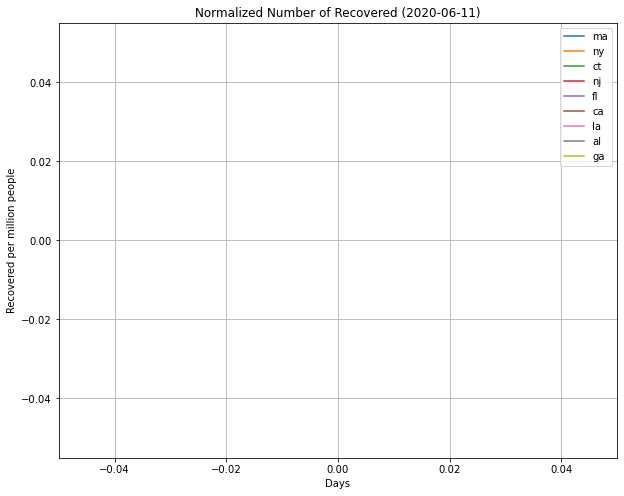

In [51]:

fig=plt.figure(figsize=[10,8])

for cname in cnames: 
    plt.plot(eval(cname + '[3]'))
plt.legend(cnames)
plt.grid()
plt.title('Normalized Number of {0} ({1})'.format(param,dfUS.columns[4]))
plt.xlabel('Days')
plt.ylabel('{0} per million people'.format(param))
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('States_normalized_{0}.png'.format(param), dpi=fig.dpi)
    

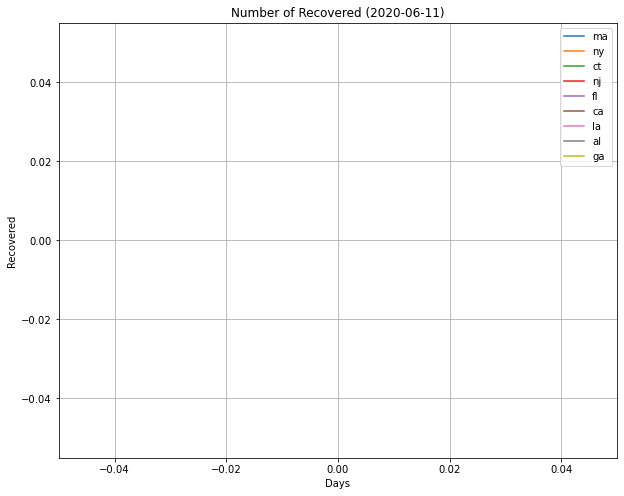

In [52]:

fig=plt.figure(figsize=[10,8])

for cname in cnames: 
    plt.plot(eval(cname + '[2]'))
plt.legend(cnames)
plt.grid()
plt.title('Number of {0} ({1})'.format(param,dfUS.columns[4]))
plt.xlabel('Days')
plt.ylabel('{0}'.format(param))
plt.autoscale(enable=True, axis='x', tight=True)
plt.savefig('States_{0}.png'.format(param), dpi=fig.dpi)
    

In [53]:
ny[3]

Series([], Name: New York normalized, dtype: float32)